# Supply Chain Shipment Pricing Data - Data Analysis and Modeling

In [0]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import os
import plotly.graph_objs as go
import plotly.offline as py

In [0]:
DataSet = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/SCMS_Delivery_History_Dataset.csv")

In [5]:
# Take a first look

DataSet.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [3]:
TotalRowCount = len(DataSet)
print("Total Number of Data Count :", TotalRowCount)

Total Number of Data Count : 10324


In [4]:
# check our datatypes
DataSet.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


Top 10 Countries Wise Count 

South Africa     1364
Nigeria           952
Côte d'Ivoire     827
Uganda            724
Vietnam           661
Haiti             549
Mozambique        506
Zimbabwe          471
Zambia            470
Tanzania          374
Name: Country, dtype: int64


Text(0.5, 0, 'Country Name')

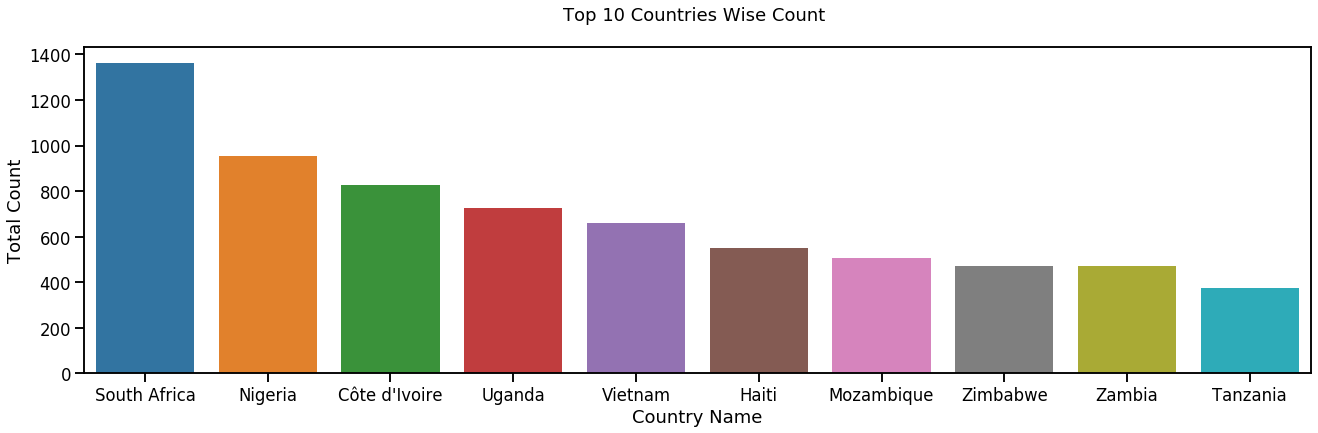

In [6]:
DataSet = DataSet.dropna()
ItemCount = DataSet["Country"].value_counts().nlargest(10)
print("Top 10 Countries Wise Count \n")
print(ItemCount)
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sn.countplot(DataSet['Country'],order = DataSet['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

# Total Pack Price for Top 15 Countries with graph

Total Pack Price for Top 15 Countries

Country
South Africa          23479.74
Vietnam               11015.11
Nigeria               10293.74
Côte d'Ivoire         10174.96
Uganda                 9781.99
Mozambique             5782.10
Haiti                  5029.42
Tanzania               4727.47
Zambia                 3780.12
Rwanda                 3721.67
Zimbabwe               3359.62
Guyana                 2209.95
Congo, DRC             2148.15
Ethiopia               1202.37
Dominican Republic     1089.23
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

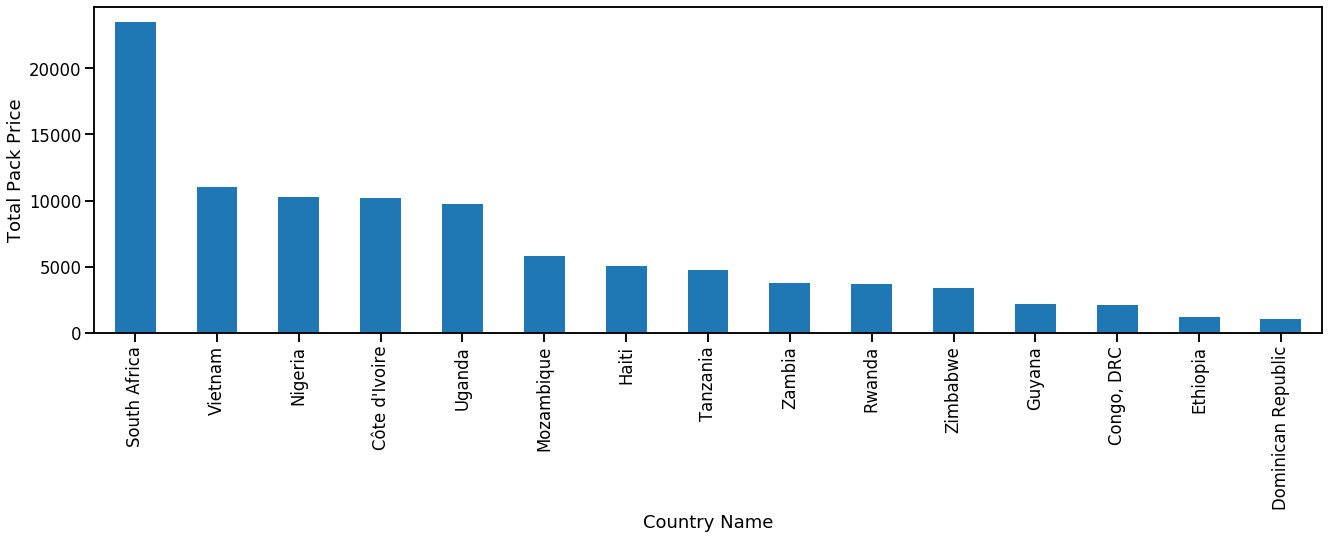

In [7]:
TotalPrice = DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

# First Line Designation Wise Count

Text(0.5, 0, 'First Line Designation')

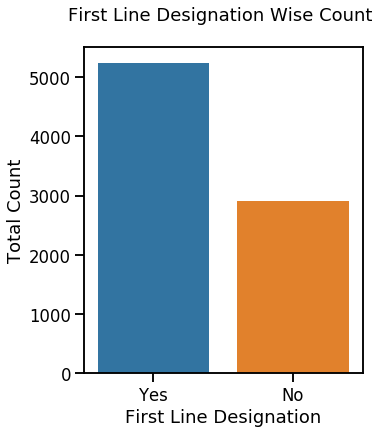

In [8]:
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(5,6))
sn.countplot(DataSet['First Line Designation'],order = DataSet['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

# Shipment Mode percentage wise Pie Chart

In [9]:
ShippingMode = DataSet["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

#Unquie Manufacturing Site Names

In [10]:
UniqueItem = DataSet['Manufacturing Site'].unique()
print("All Unique Manufacturing Site \n")
print(UniqueItem)

All Unique Manufacturing Site 

['BMS Meymac, France' 'Aurobindo Unit III, India'
 'ABBVIE Ludwigshafen Germany' 'Gilead(Nycomed) Oranienburg DE'
 'Ranbaxy, Paonta Shahib, India' 'Mylan (formerly Matrix) Nashik'
 'Roche Basel' 'GSK Ware (UK)' 'Novartis Pharma AG, Switzerland'
 'BI, Ingelheim, Germany' 'Ipca Dadra/Nagar Haveli IN' 'MSD, Haarlem, NL'
 'Aspen-OSD, Port Elizabeth, SA' 'ABBVIE (Abbott) Logis. UK'
 'Gland Pharma Ltd Pally Factory' 'Cipla, Goa, India'
 'GSK Mississauga (Canada)' 'GSK Aranda' 'Hetero Unit III Hyderabad IN'
 'ABBVIE (Abbott) France' 'Strides, Bangalore, India.'
 'GSK Cape Town Factory (South Africa)' "MSD Midrand, J'burg, SA"
 'Boehringer Ing., Koropi, GR' 'GSK Crawley'
 'Novartis Pharma Suffern, USA' 'Micro Labs Ltd. (Brown & Burk), India'
 'Meditab (for Cipla) Daman IN' 'Medopharm Malur Factory, INDIA'
 'Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway'
 'MSD Manati, Puerto Rico, (USA)'
 'Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC

# Shipment Mode, Min and Mean value for Air

In [11]:
ItemData=DataSet[DataSet['Shipment Mode']=='Air']
print ("The Max Air Shipment Mode is :",ItemData['Unit of Measure (Per Pack)'].max())
print ("The Min Air Shipment is :",ItemData['Unit of Measure (Per Pack)'].min())
ItemTypeMean = ItemData['Unit of Measure (Per Pack)'].mean()
print ("The Mean Air Shipment is :", round(ItemTypeMean,2))

The Max Air Shipment Mode is : 1000
The Min Air Shipment is : 5
The Mean Air Shipment is : 89.33


# Top 10 Manufacturing Site for all Shipment Mode with Graph

Manufacturing Site
Aurobindo Unit III, India         2978
Mylan (formerly Matrix) Nashik    1407
Hetero Unit III Hyderabad IN       868
Cipla, Goa, India                  624
Strides, Bangalore, India.         528
ABBVIE Ludwigshafen Germany        350
ABBVIE (Abbott) Logis. UK          204
BMS Meymac, France                 129
Aspen-OSD, Port Elizabeth, SA      125
MSD, Haarlem, NL                   117
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

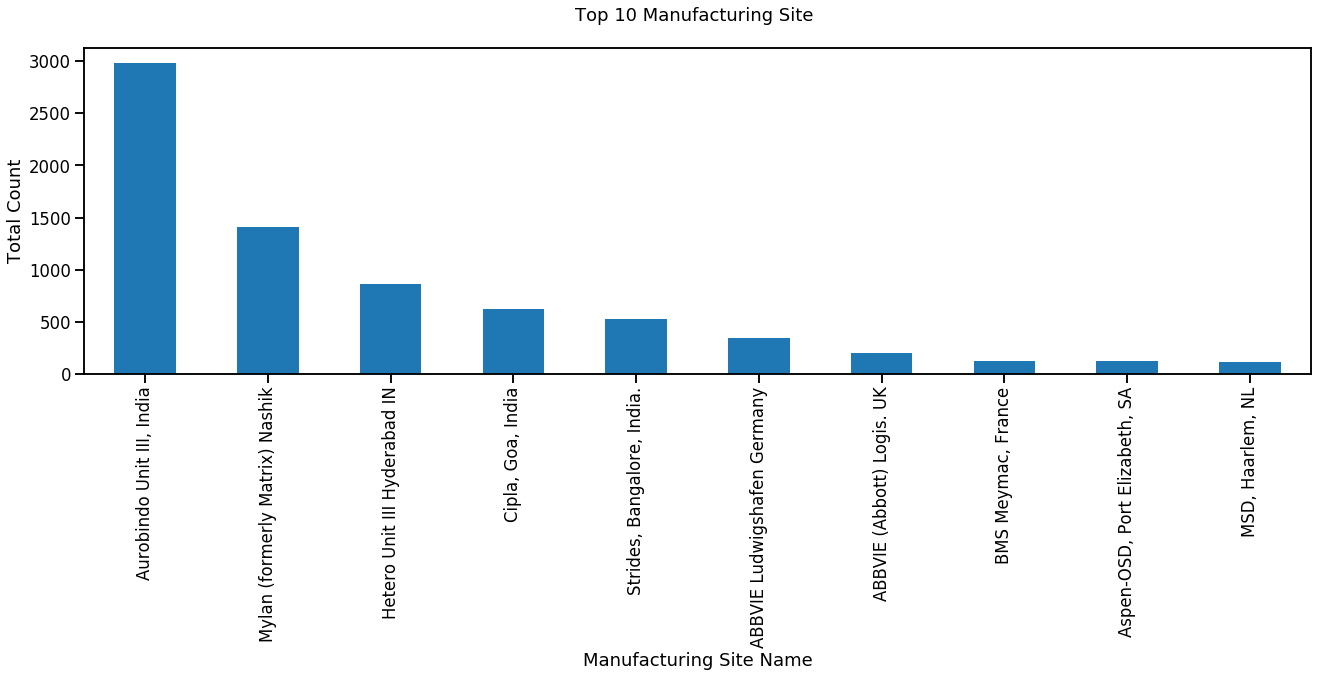

In [12]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=DataSet.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

# Top 10 Manufacturing Site for Air Shipment Mode with Graph

Top 10 Air Manufacturing Site 

Aurobindo Unit III, India         1641
Mylan (formerly Matrix) Nashik     695
Hetero Unit III Hyderabad IN       417
ABBVIE Ludwigshafen Germany        281
Cipla, Goa, India                  264
Strides, Bangalore, India.         251
ABBVIE (Abbott) Logis. UK          147
MSD, Haarlem, NL                    90
BMS Meymac, France                  83
Aspen-OSD, Port Elizabeth, SA       80
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

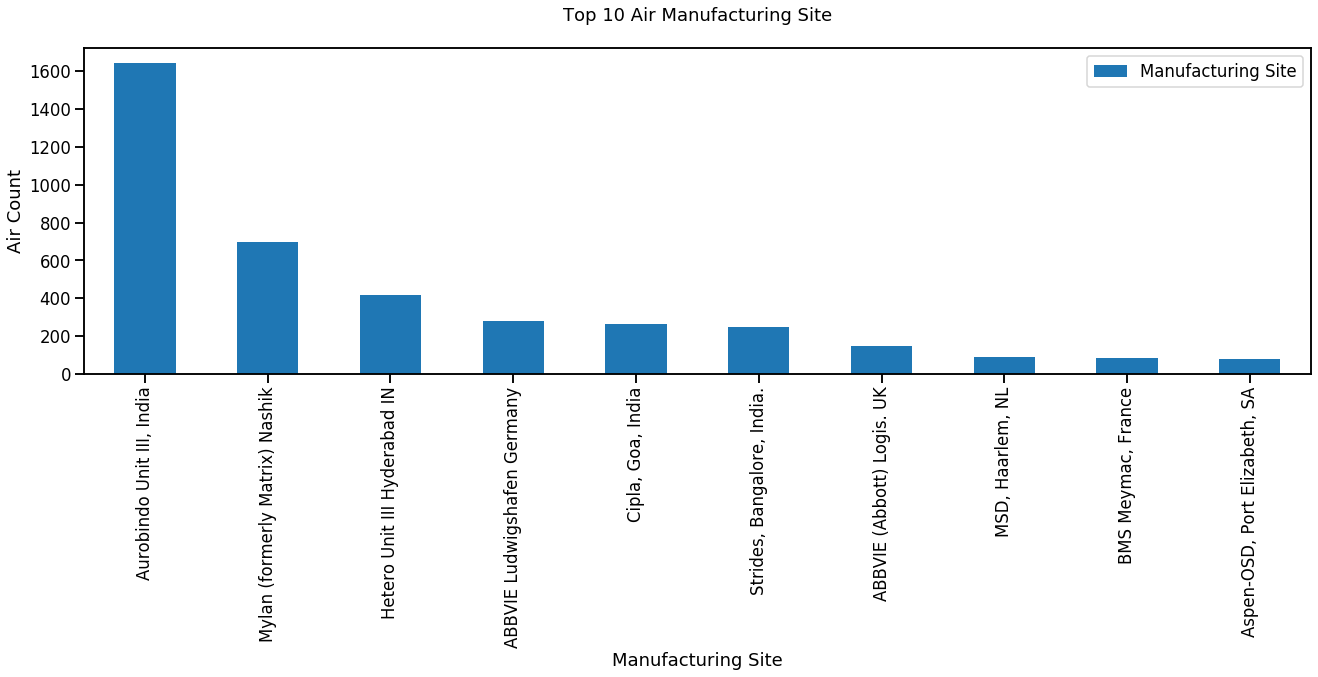

In [13]:
# Top 10 Air Shipment Mode in Bar Chart
ItemData=DataSet[DataSet['Shipment Mode']=='Air']
DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Air Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Air Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

# Shipment Mode and Pack Price in Bar Plot Graph

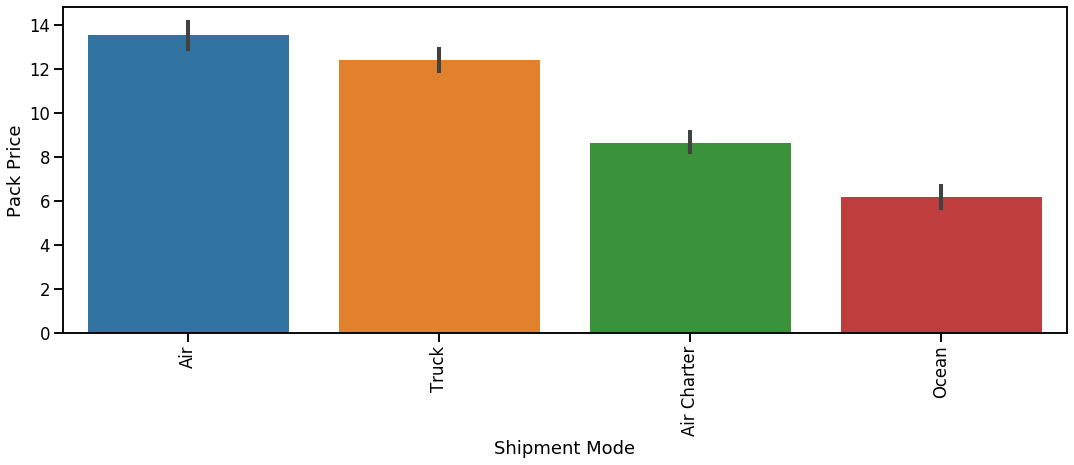

In [14]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.barplot('Shipment Mode','Pack Price', data = DataSet)
plt.show()

# Conclusion
- Top Country for Pack Price : Nigeria - 25,620.72
- Top Shipping Mode : Air
- The Max Air Shipment Mode is : 1000
- The Min Air Shipment is : 1
- The Mean Air Shipment is : 82.35
- Top Manufacturing Site : Aurobindo Unit III, India - 3172
- Top Air Manufacturing Site : Aurobindo Unit III, India - 1694